# UPY-SL-Regression
## Test challenge for students of UPY D7A
### Team Members: 
* Andress Arana
* Gustavo Bacab
* Ricardo Centeno 
* Adrian Gonzalez

In [2]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# importind data
data = pd.read_csv("C:/Users/andre/OneDrive/Documents/UPY/Q7/Supervised Learning/U2 Evaluation Kaggle Challenge/upy-sl-regression/train.csv")
data.head()

,Id,yearID,S,2B,3B,HR,BB,HBP,SH,SF,OIP,SO,GIDP,SB,CS,R
0,2646,2010,874,276,27,126,463,33.0,58.0,33.0,2170,1207.0,119.0,87.0,36.0,587
1,2648,2010,930,227,16,101,459,39.0,42.0,40.0,2261,1184.0,110.0,142.0,39.0,513
2,1343,1960,945,206,33,123,596,36.0,72.0,37.0,2195,800.0,127.0,37.0,24.0,682
3,929,1934,1100,233,44,83,375,28.0,81.0,NaN,2858,440.0,128.0,30.0,NaN,683
4,422,1903,964,162,91,12,292,46.0,170.0,NaN,2321,524.0,NaN,128.0,NaN,567


In [4]:
data.shape

(2000, 16)

In [5]:
data.columns

Index(['Id', 'yearID', 'S', '2B', '3B', 'HR', 'BB', 'HBP', 'SH', 'SF', 'OIP',
       'SO', 'GIDP', 'SB', 'CS', 'R'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2000 non-null   int64  
 1   yearID  2000 non-null   int64  
 2   S       2000 non-null   int64  
 3   2B      2000 non-null   int64  
 4   3B      2000 non-null   int64  
 5   HR      2000 non-null   int64  
 6   BB      2000 non-null   int64  
 7   HBP     1895 non-null   float64
 8   SH      1805 non-null   float64
 9   SF      1454 non-null   float64
 10  OIP     2000 non-null   int64  
 11  SO      1947 non-null   float64
 12  GIDP    1540 non-null   float64
 13  SB      1919 non-null   float64
 14  CS      1588 non-null   float64
 15  R       2000 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 250.1 KB


We can see from using the info() method that there are null values in the columns: HBP, SH, SF, SO, GIDP, SB and CS

In [7]:
data.dtypes

Id          int64
yearID      int64
S           int64
2B          int64
3B          int64
HR          int64
BB          int64
HBP       float64
SH        float64
SF        float64
OIP         int64
SO        float64
GIDP      float64
SB        float64
CS        float64
R           int64
dtype: object

In [8]:
data['HBP'].fillna((data['HBP'].mean()), inplace=True)
data['SH'].fillna((data['SH'].mean()), inplace=True)
data['SF'].fillna((data['SF'].mean()), inplace=True)
data['SO'].fillna((data['SO'].mean()), inplace=True)
data['GIDP'].fillna((data['GIDP'].mean()), inplace=True)
data['SB'].fillna((data['SB'].mean()), inplace=True)
data['CS'].fillna((data['CS'].mean()), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2000 non-null   int64  
 1   yearID  2000 non-null   int64  
 2   S       2000 non-null   int64  
 3   2B      2000 non-null   int64  
 4   3B      2000 non-null   int64  
 5   HR      2000 non-null   int64  
 6   BB      2000 non-null   int64  
 7   HBP     2000 non-null   float64
 8   SH      2000 non-null   float64
 9   SF      2000 non-null   float64
 10  OIP     2000 non-null   int64  
 11  SO      2000 non-null   float64
 12  GIDP    2000 non-null   float64
 13  SB      2000 non-null   float64
 14  CS      2000 non-null   float64
 15  R       2000 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 250.1 KB


In [10]:
data.head()

,Id,yearID,S,2B,3B,HR,BB,HBP,SH,SF,OIP,SO,GIDP,SB,CS,R
0,2646,2010,874,276,27,126,463,33.0,58.0,33.000000,2170,1207.0,119.000000,87.0,36.000000,587
1,2648,2010,930,227,16,101,459,39.0,42.0,40.000000,2261,1184.0,110.000000,142.0,39.000000,513
2,1343,1960,945,206,33,123,596,36.0,72.0,37.000000,2195,800.0,127.000000,37.0,24.000000,682
3,929,1934,1100,233,44,83,375,28.0,81.0,34.984182,2858,440.0,128.000000,30.0,42.524559,683
4,422,1903,964,162,91,12,292,46.0,170.0,34.984182,2321,524.0,106.355195,128.0,42.524559,567


Text(0.5, 1.0, 'Year - Runs Scored\nScatter Plot')

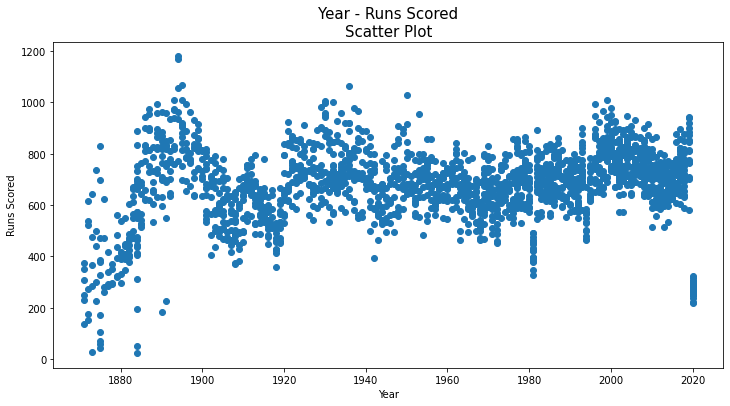

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(data['yearID'],data['R'])
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.title("Year - Runs Scored\nScatter Plot",fontsize=15);

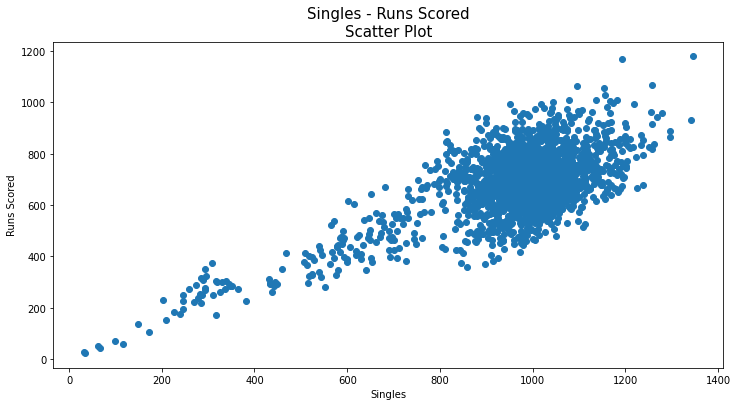

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(data['S'],data['R'])
plt.xlabel("Singles")
plt.ylabel("Runs Scored")
plt.title("Singles - Runs Scored\nScatter Plot",fontsize=15);

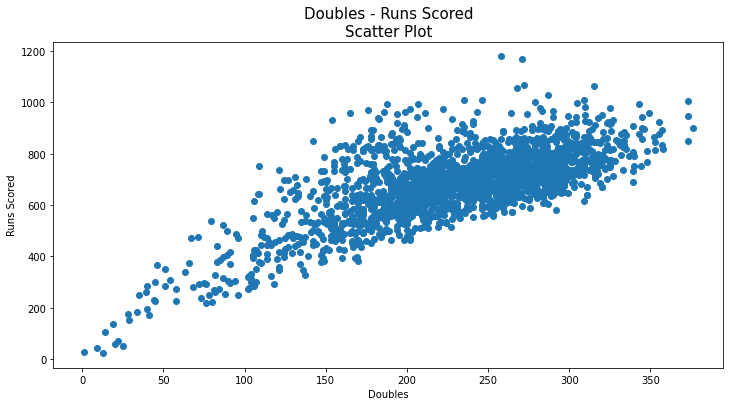

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(data['2B'],data['R'])
plt.xlabel("Doubles")
plt.ylabel("Runs Scored")
plt.title("Doubles - Runs Scored\nScatter Plot",fontsize=15);

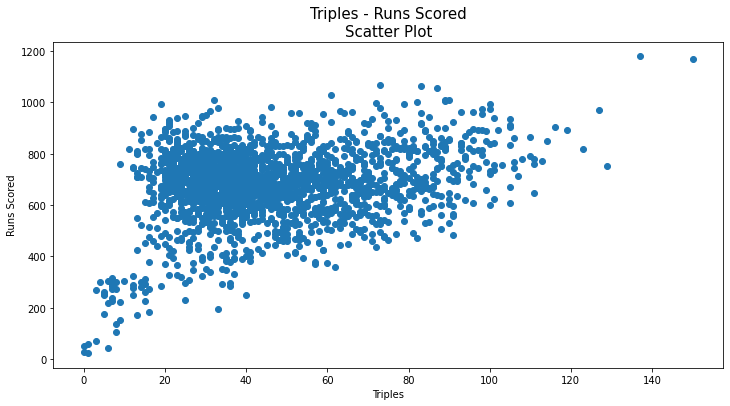

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(data['3B'],data['R'])
plt.xlabel("Triples")
plt.ylabel("Runs Scored")
plt.title("Triples - Runs Scored\nScatter Plot",fontsize=15);

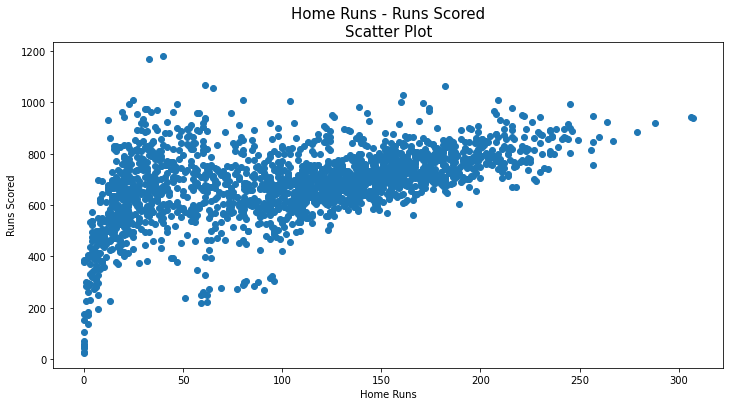

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(data['HR'],data['R'])
plt.xlabel("Home Runs")
plt.ylabel("Runs Scored")
plt.title("Home Runs - Runs Scored\nScatter Plot",fontsize=15);

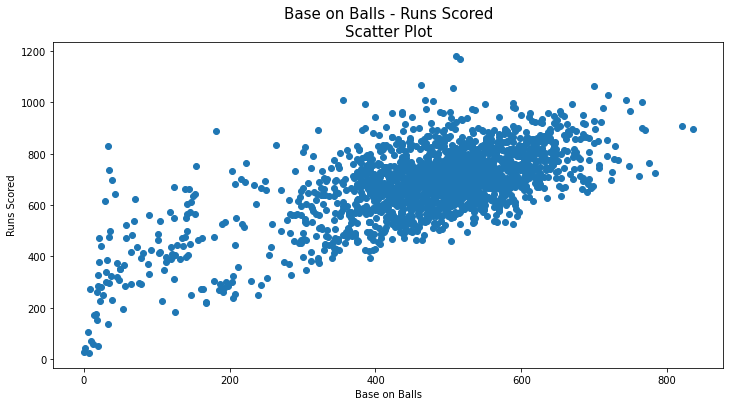

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(data['BB'],data['R'])
plt.xlabel("Base on Balls")
plt.ylabel("Runs Scored")
plt.title("Base on Balls - Runs Scored\nScatter Plot",fontsize=15);

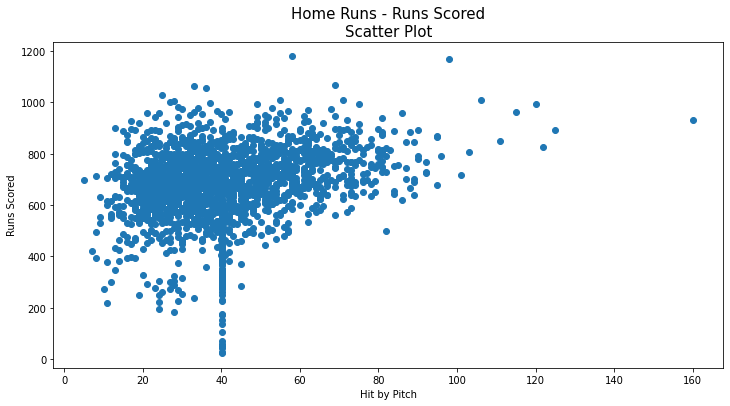

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(data['HBP'],data['R'])
plt.xlabel("Hit by Pitch")
plt.ylabel("Runs Scored")
plt.title("Home Runs - Runs Scored\nScatter Plot",fontsize=15);

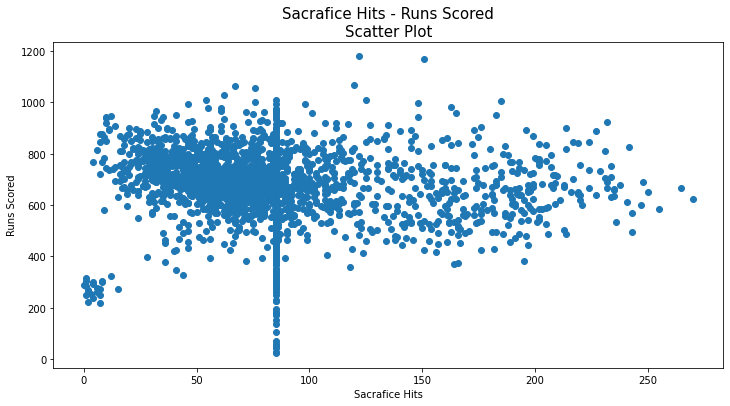

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(data['SH'],data['R'])
plt.xlabel("Sacrafice Hits")
plt.ylabel("Runs Scored")
plt.title("Sacrafice Hits - Runs Scored\nScatter Plot",fontsize=15);

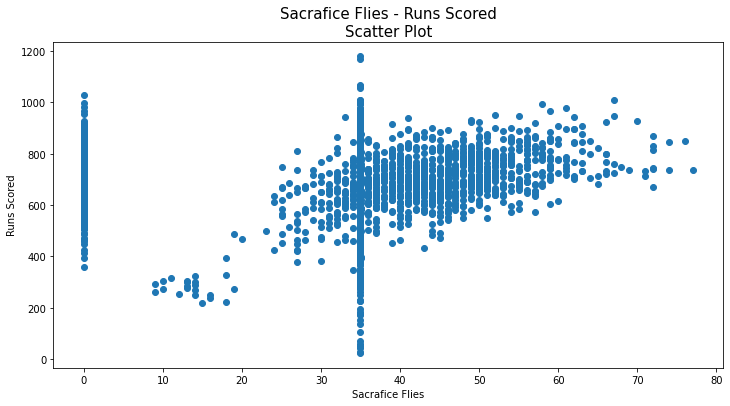

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(data['SF'],data['R'])
plt.xlabel("Sacrafice Flies")
plt.ylabel("Runs Scored")
plt.title("Sacrafice Flies - Runs Scored\nScatter Plot",fontsize=15);

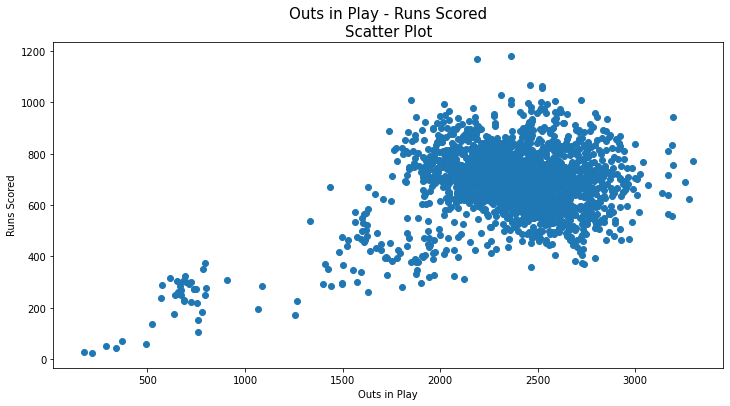

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(data['OIP'],data['R'])
plt.xlabel("Outs in Play")
plt.ylabel("Runs Scored")
plt.title("Outs in Play - Runs Scored\nScatter Plot",fontsize=15);

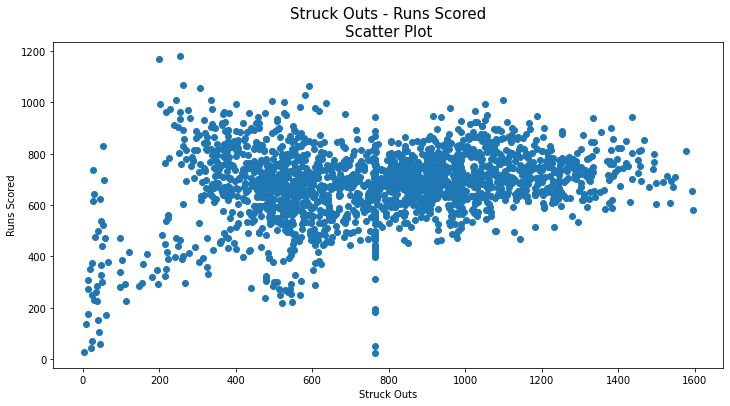

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(data['SO'],data['R'])
plt.xlabel("Struck Outs")
plt.ylabel("Runs Scored")
plt.title("Struck Outs - Runs Scored\nScatter Plot",fontsize=15);

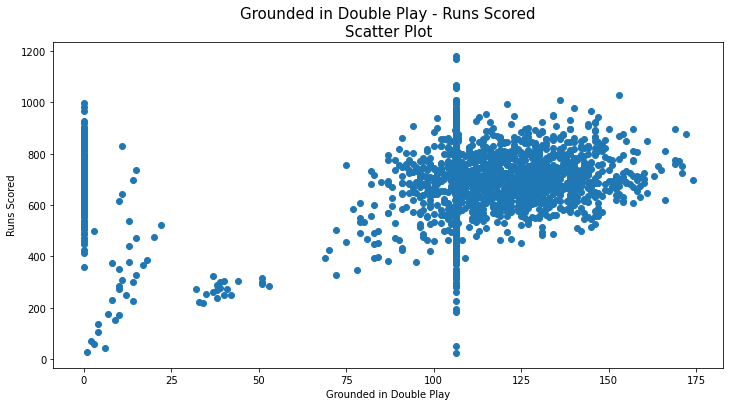

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(data['GIDP'],data['R'])
plt.xlabel("Grounded in Double Play")
plt.ylabel("Runs Scored")
plt.title("Grounded in Double Play - Runs Scored\nScatter Plot",fontsize=15);

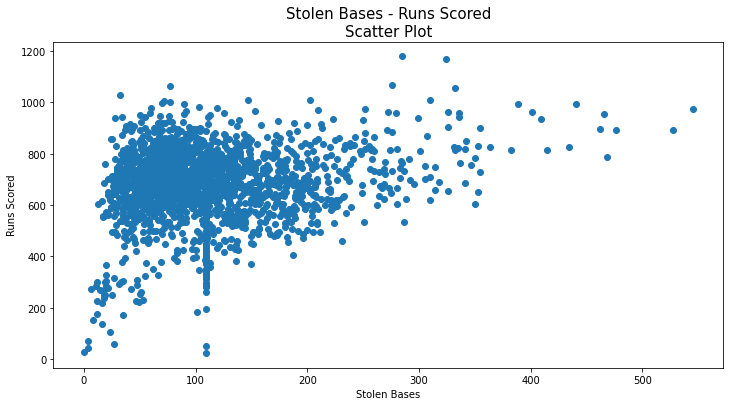

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(data['SB'],data['R'])
plt.xlabel("Stolen Bases")
plt.ylabel("Runs Scored")
plt.title("Stolen Bases - Runs Scored\nScatter Plot",fontsize=15);

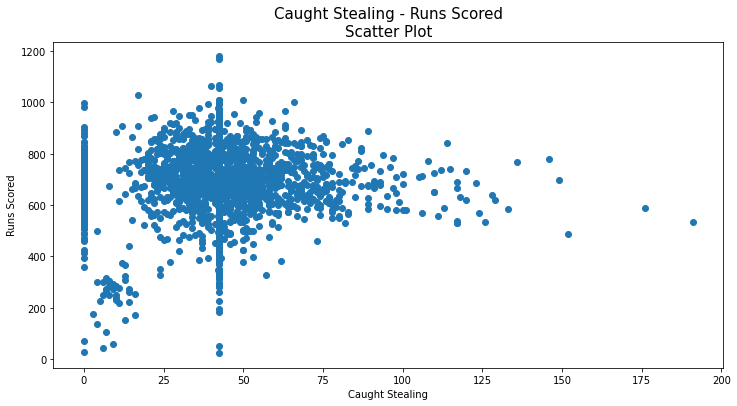

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(data['CS'],data['R'])
plt.xlabel("Caught Stealing")
plt.ylabel("Runs Scored")
plt.title("Caught Stealing - Runs Scored\nScatter Plot",fontsize=15);